## Preprocessing - załadowanie danych, przygotowanie danych, analiza rozkładu zmiennych, standardyzacja, ekstrakcja cech

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/data.csv')
df = df.drop(['Mild', 'Mod', 'Sev'], axis=1)
df

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,mild,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,severe,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,mild,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,mild,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,mild,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,mild,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,severe,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,mild,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,mild,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [3]:
col_names = []
for col in df.columns:
    col_names.append(col)
    
col_mapper = {i: f'{col_names[i]}' for i in range(0, 12)}
col_mapper

{0: 'Severity',
 1: 'Age',
 2: 'BMI',
 3: 'CSA',
 4: 'PB',
 5: 'Duration',
 6: 'NRS',
 7: 'Sex',
 8: 'Side',
 9: 'Diabetes',
 10: 'NP',
 11: 'Weakness'}

Należy przemapować kolumny Severity	Mild Mod Sev do wartości typu integer aby można było prawidłowo przeprowadzić standardyzację i dalsze operacje uczenia.

In [4]:
print(df['Severity'].unique())

['mild' 'severe' 'moderate']


In [5]:
# Severenity: mild - 0, moderate - 1, severe - 1
# Mild: mild - 0, others - 1
# Mod: moderate - 0, others - 1
# Sev: severe - 0, others - 1

df_adjusted = df

df_adjusted["Severity"].replace({"mild": 0, "moderate": 1, "severe": 2}, inplace=True)
# df_adjusted["Mild"].replace({"mild": 0, "others": 1}, inplace=True)
# df_adjusted["Mod"].replace({"moderate": 0, "others": 1}, inplace=True)
# df_adjusted["Sev"].replace({"severe": 0, "others": 1}, inplace=True)

df_adjusted
        


,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,"21,09375",10,"1,9",3,2,1,1,0,0,0
1,2,68,"20,41522491",13,"1,8",12,6,0,0,0,0,0
2,0,68,"20,41522491",13,"1,5",12,3,0,1,0,0,0
3,0,63,"28,5075216",13,"2,9",1,4,1,1,0,0,0
4,0,87,"22,93975069",12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,"22,18934911",11,"1,8",2,3,1,1,0,0,0
1033,2,49,"24,19649379",16,"3,1",8,5,1,0,0,1,1
1034,0,41,"23,80869017",12,"1,7",4,4,0,0,0,0,0
1035,0,67,"26,98600101",11,"3,9",8,3,1,1,0,0,0


In [6]:
for i in range (1037):
    df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
    df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
    df_adjusted['PB'][i] = df_adjusted['PB'][i].replace(',', '.')

df_adjusted

<ipython-input-6-2df6a078f9c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['BMI'][i] = df_adjusted['BMI'][i].replace(',', '.')
<ipython-input-6-2df6a078f9c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['CSA'][i] = df_adjusted['CSA'][i].replace(',', '.')
<ipython-input-6-2df6a078f9c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted['PB'][i] = df_adjusted['PB'][i].replace(',', '.')


,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.09375,10,1.9,3,2,1,1,0,0,0
1,2,68,20.41522491,13,1.8,12,6,0,0,0,0,0
2,0,68,20.41522491,13,1.5,12,3,0,1,0,0,0
3,0,63,28.5075216,13,2.9,1,4,1,1,0,0,0
4,0,87,22.93975069,12,2,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.18934911,11,1.8,2,3,1,1,0,0,0
1033,2,49,24.19649379,16,3.1,8,5,1,0,0,1,1
1034,0,41,23.80869017,12,1.7,4,4,0,0,0,0,0
1035,0,67,26.98600101,11,3.9,8,3,1,1,0,0,0


In [7]:
df_adjusted['BMI'] = df_adjusted['BMI'].astype(float)
df_adjusted['CSA'] = df_adjusted['CSA'].astype(float)
df_adjusted['PB'] = df_adjusted['PB'].astype(float)

### Analiza danych - parametry statystyczne, rozkład zmiennych, macierz korelacji, boxploty

In [8]:
df.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Severity  1037 non-null   int64  
 1   Age       1037 non-null   int64  
 2   BMI       1037 non-null   float64
 3   CSA       1037 non-null   float64
 4   PB        1037 non-null   float64
 5   Duration  1037 non-null   int64  
 6   NRS       1037 non-null   int64  
 7   Sex       1037 non-null   int64  
 8   Side      1037 non-null   int64  
 9   Diabetes  1037 non-null   int64  
 10  NP        1037 non-null   int64  
 11  Weakness  1037 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 97.3 KB


In [9]:
df.describe()

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
count,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000,1037.000000
mean,0.756027,57.950820,24.756429,15.152266,2.468910,8.274831,4.395371,0.609450,0.492768,0.140791,0.439730,0.187078
std,0.821569,10.821583,3.416702,4.304797,1.827584,9.589684,1.842206,0.488109,0.500189,0.347973,0.496594,0.390162
min,0.000000,19.000000,17.632653,7.000000,0.210000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,51.000000,22.432303,12.000000,1.700000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,58.000000,24.337480,14.000000,2.200000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,65.000000,26.729927,17.000000,2.900000,12.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,87.000000,42.598077,37.000000,40.000000,60.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-10-95dd16674642>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, bins=5);


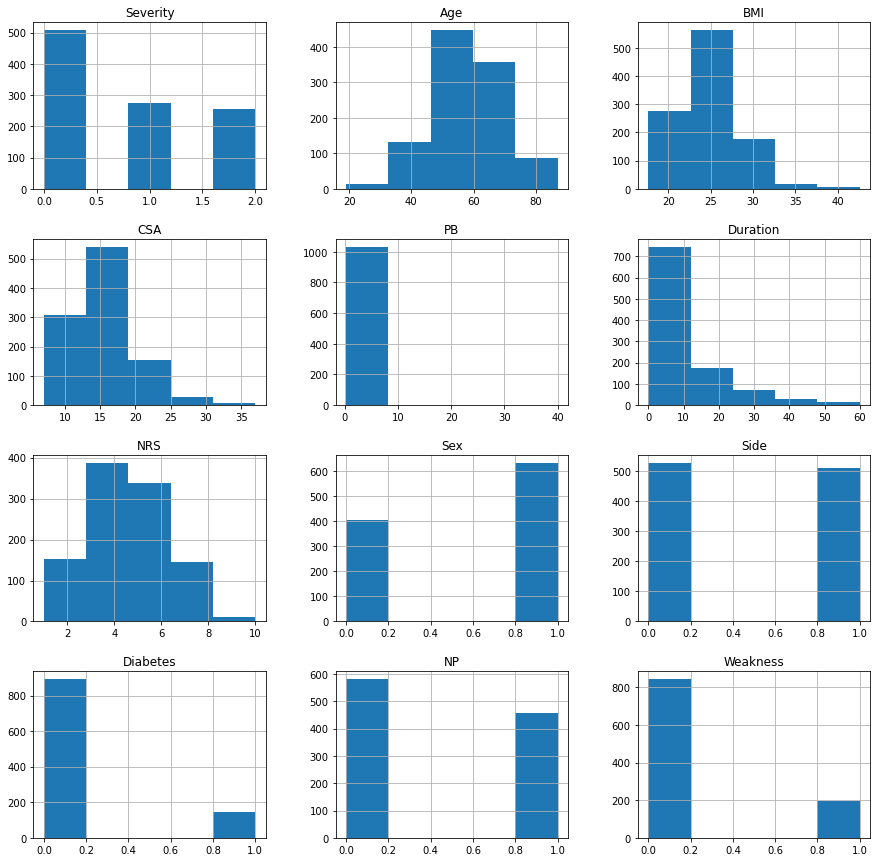

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df.hist(ax=ax, bins=5);
fig.savefig('hist-std.png')

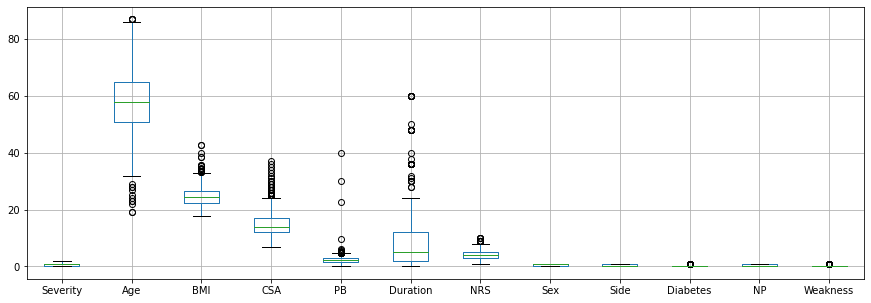

In [11]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df.boxplot(ax=ax);

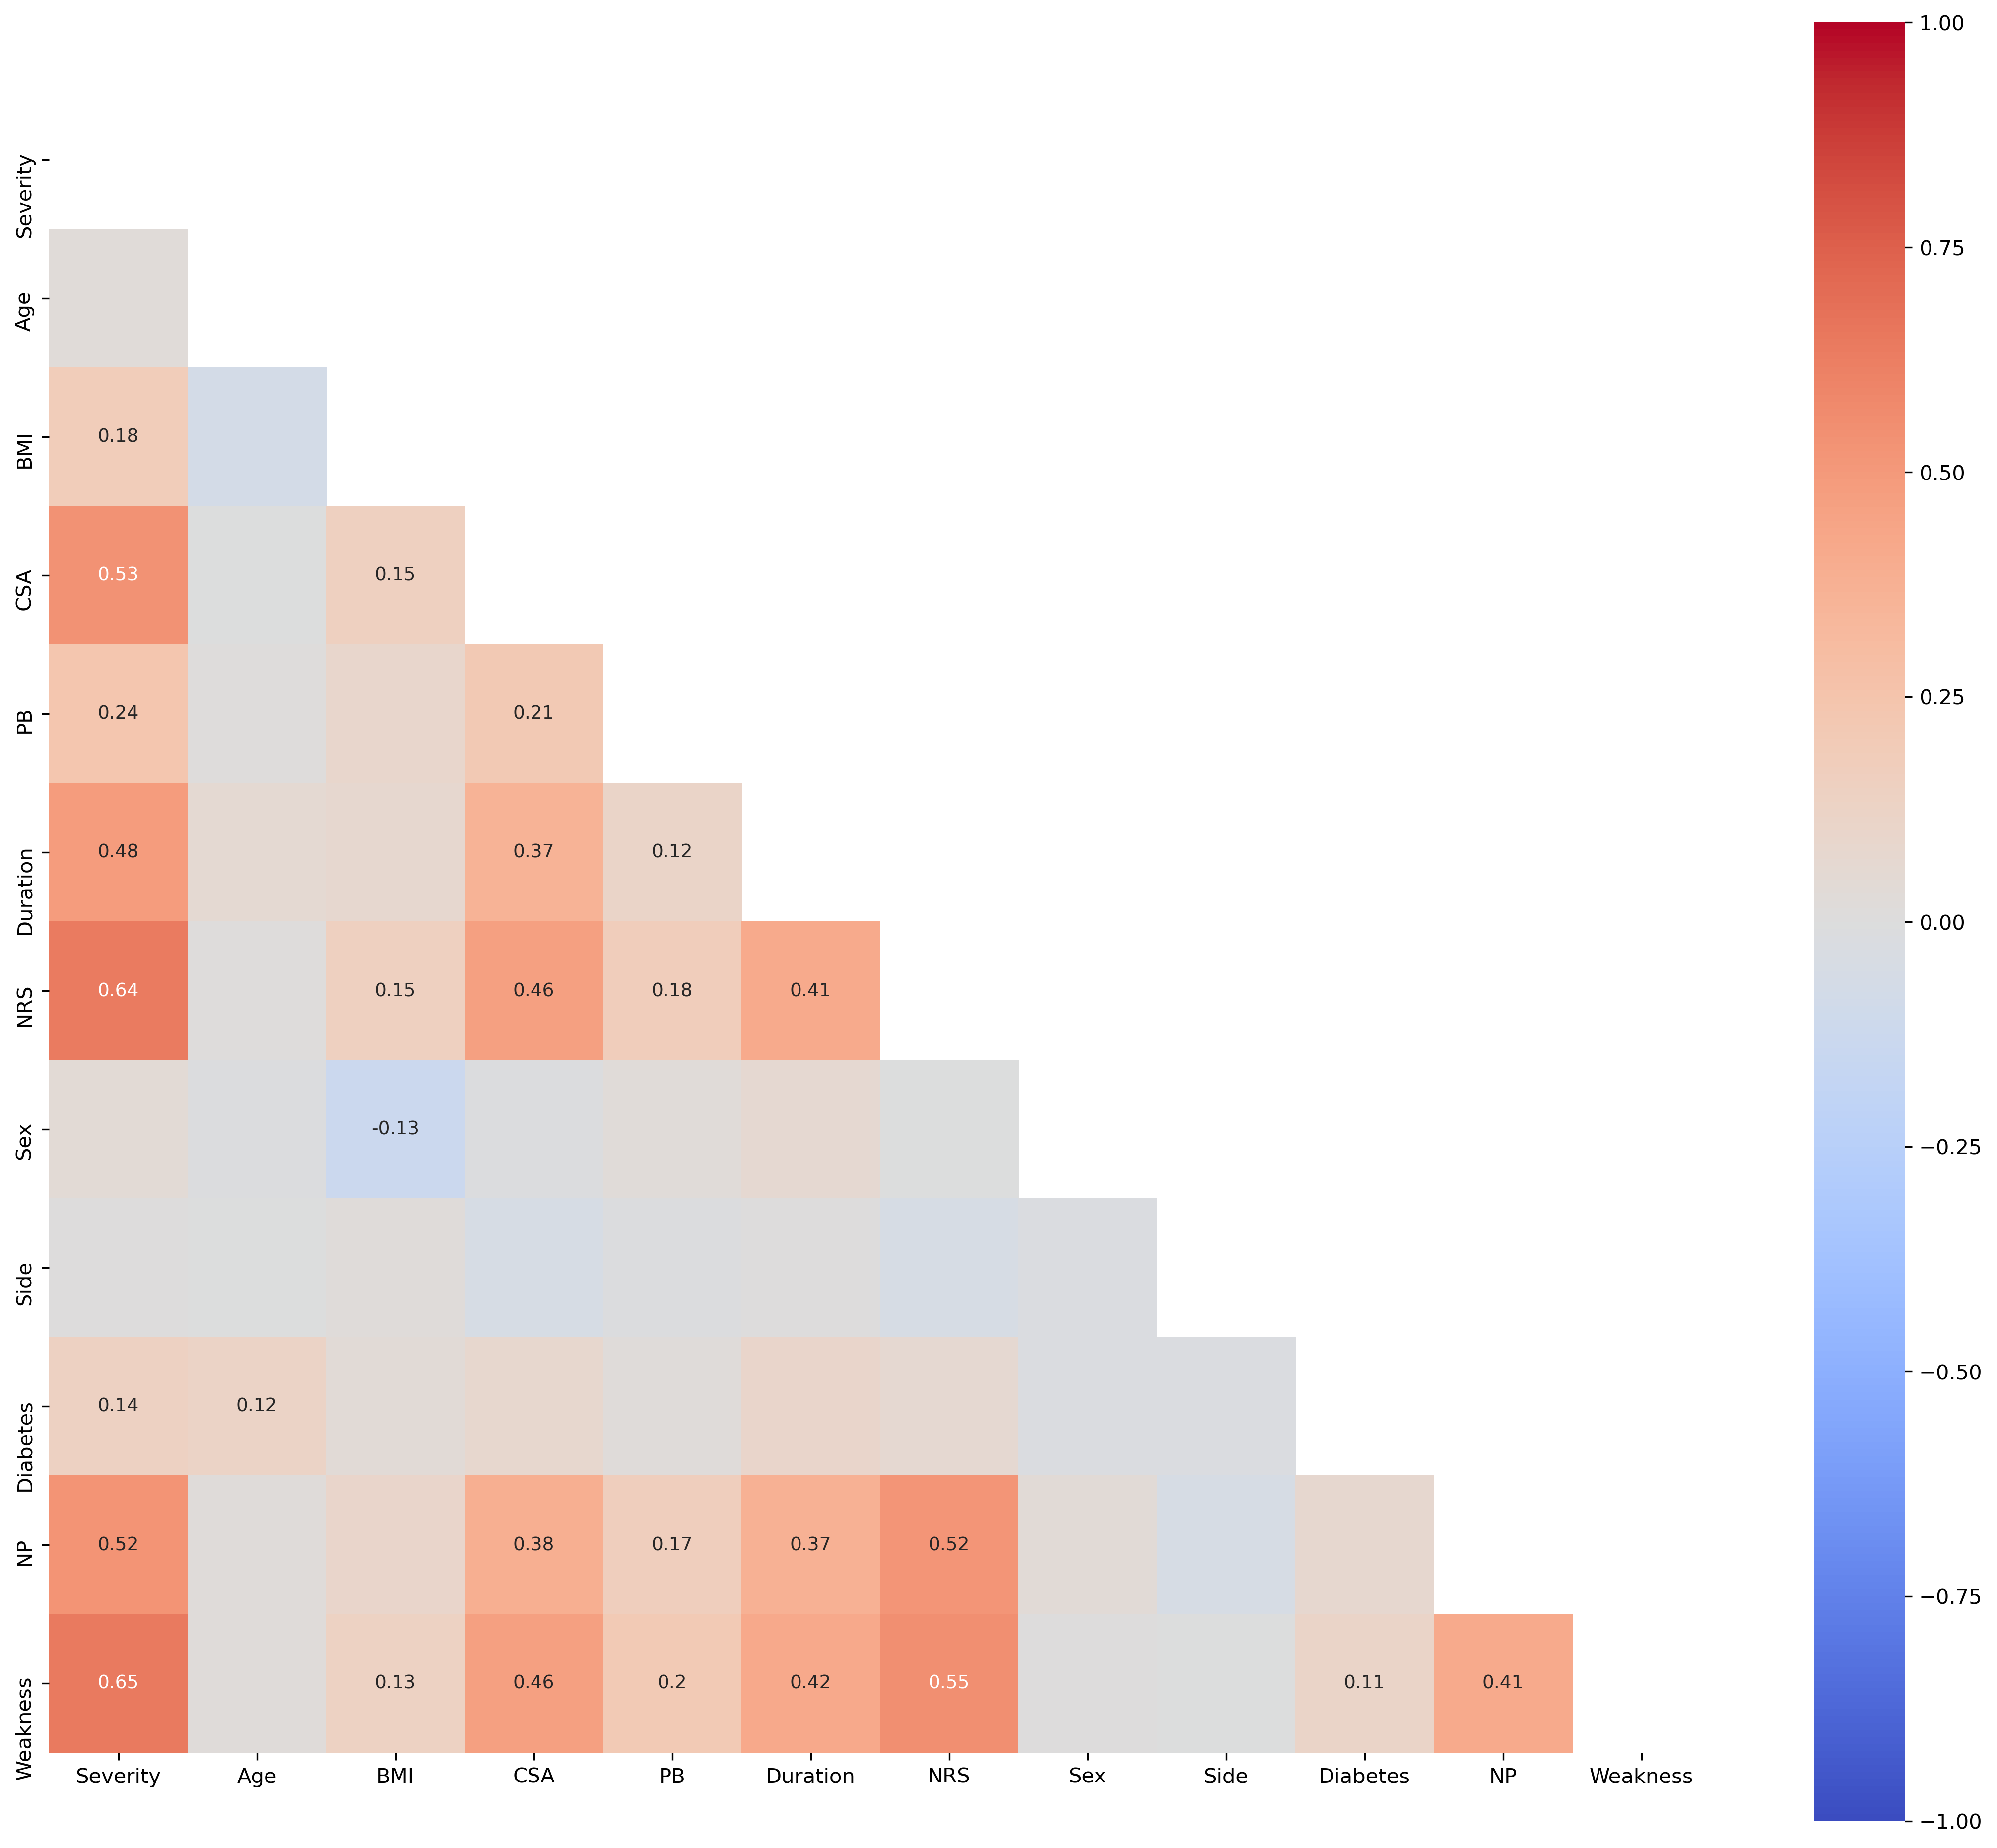

In [12]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [13]:
df_copy = df
print(df_copy.isnull().sum())

Severity    0
Age         0
BMI         0
CSA         0
PB          0
Duration    0
NRS         0
Sex         0
Side        0
Diabetes    0
NP          0
Weakness    0
dtype: int64


# Usunięcie obserwacji odstających

In [14]:
# from scipy import stats

df_removed = df
# numerical_only = df_removed.loc[:, df_removed.columns != 'Severity']
# outliers = np.abs(stats.zscore(numerical_only)) < 3
# df_removed = df_removed[outliers.all(axis=1)]
# df_removed.reset_index(drop=True, inplace=True)

# df_removed

Usunięto 47 obserwacji odstających. Poniżej przedstawiono rozkłady, boxploty i macierz korelacji dla otrzymanych danych

<ipython-input-15-44ec31af0765>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_removed.hist(ax=ax, bins=5);


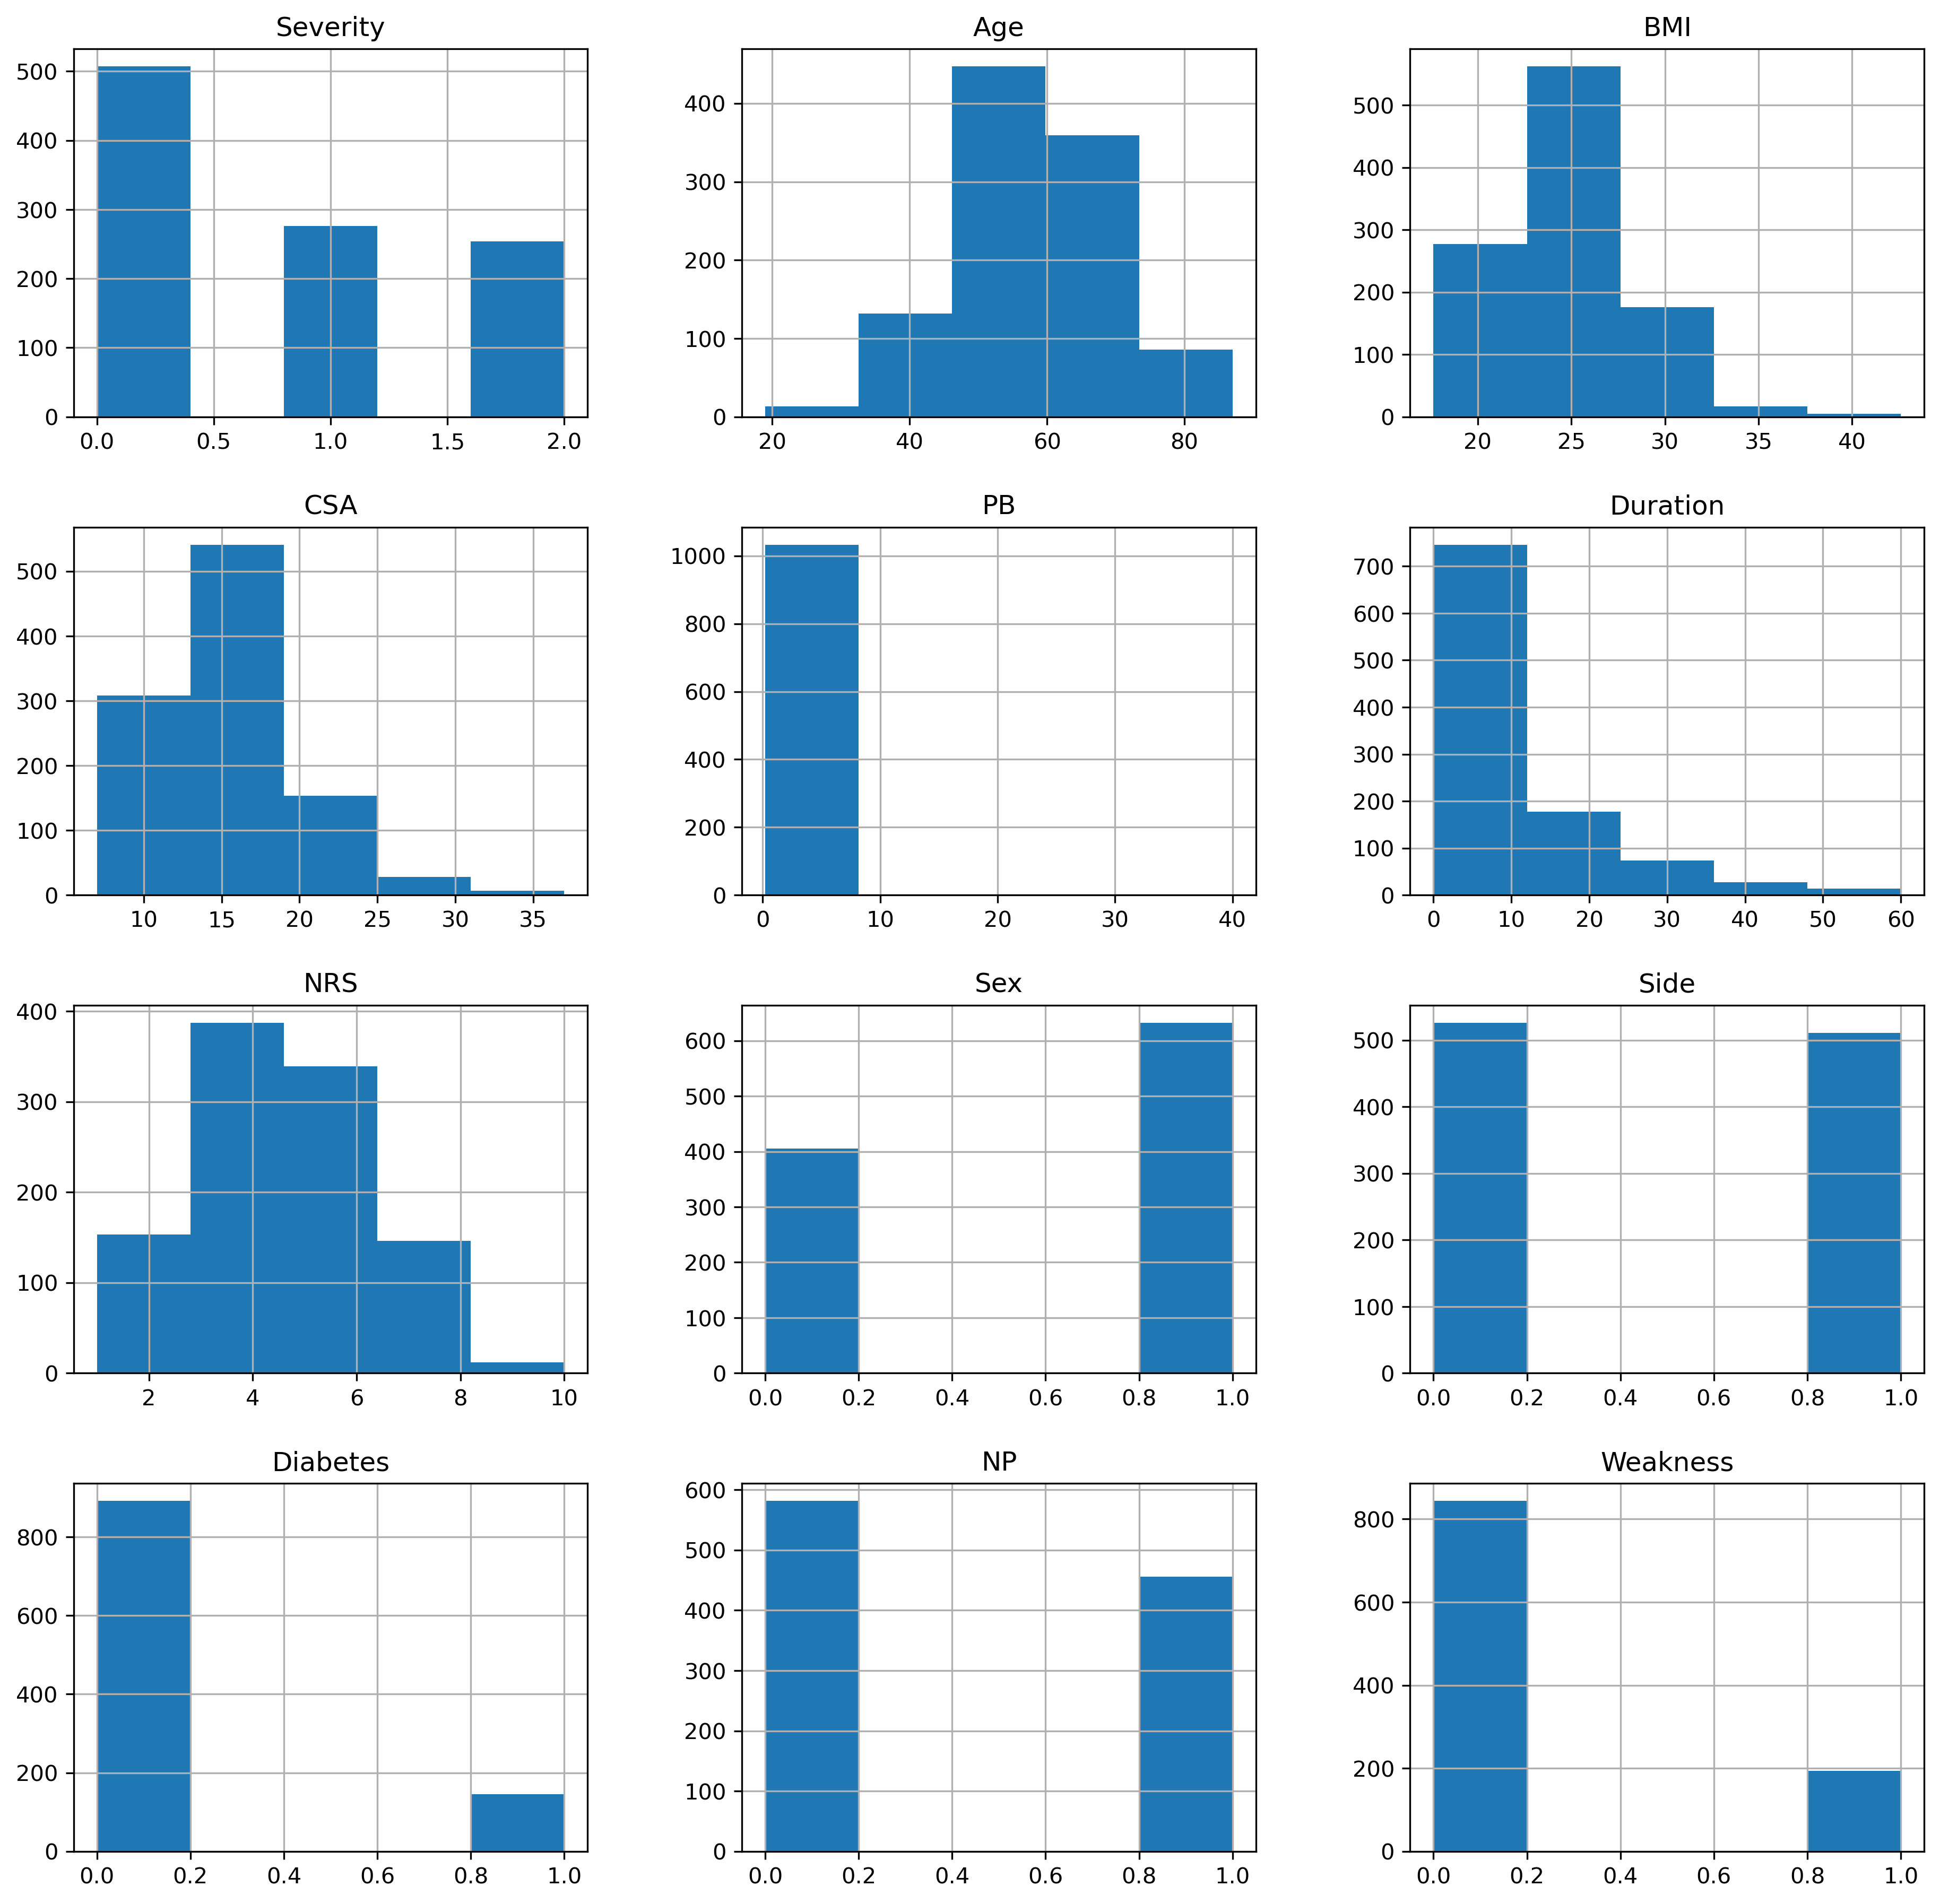

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()

df_removed.hist(ax=ax, bins=5);

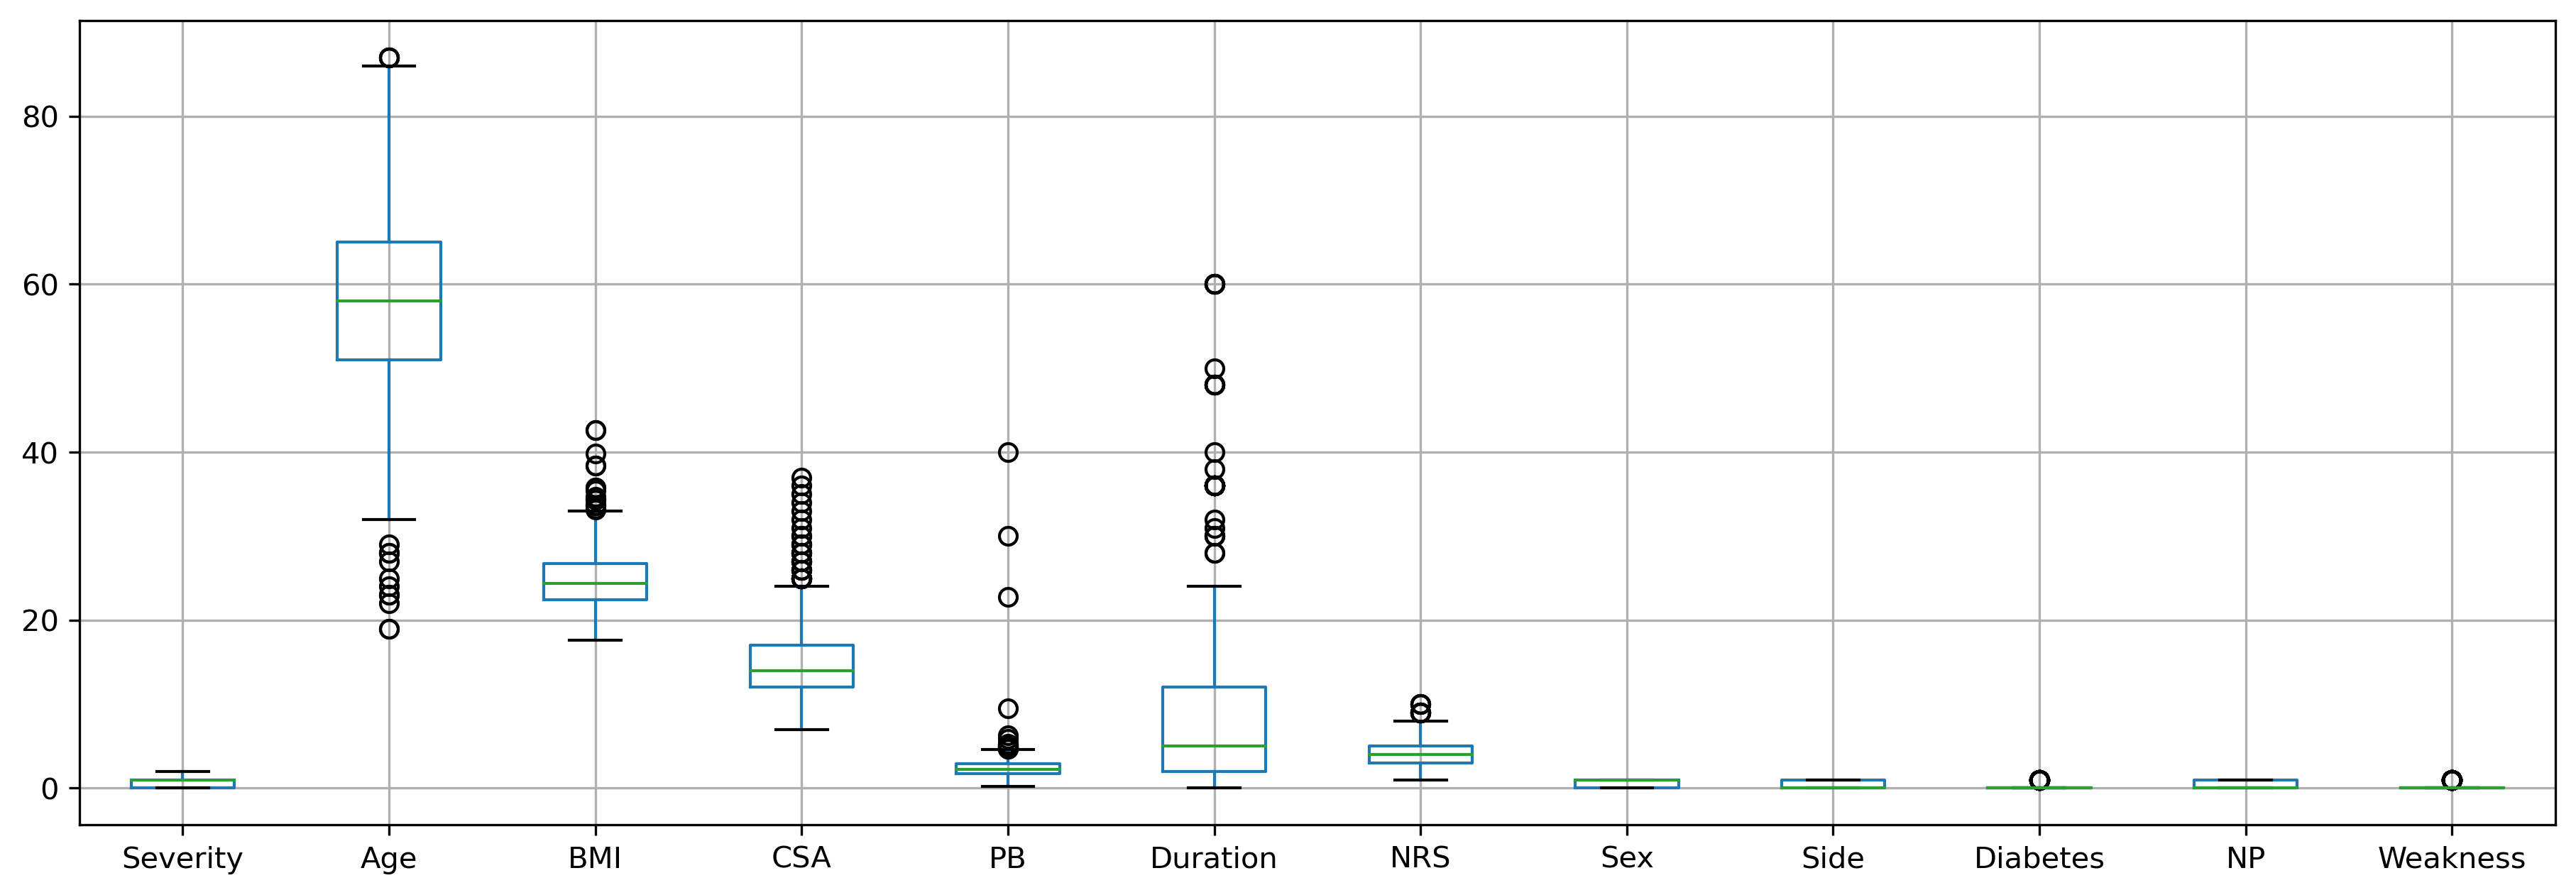

In [16]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
df_removed.boxplot(ax=ax);

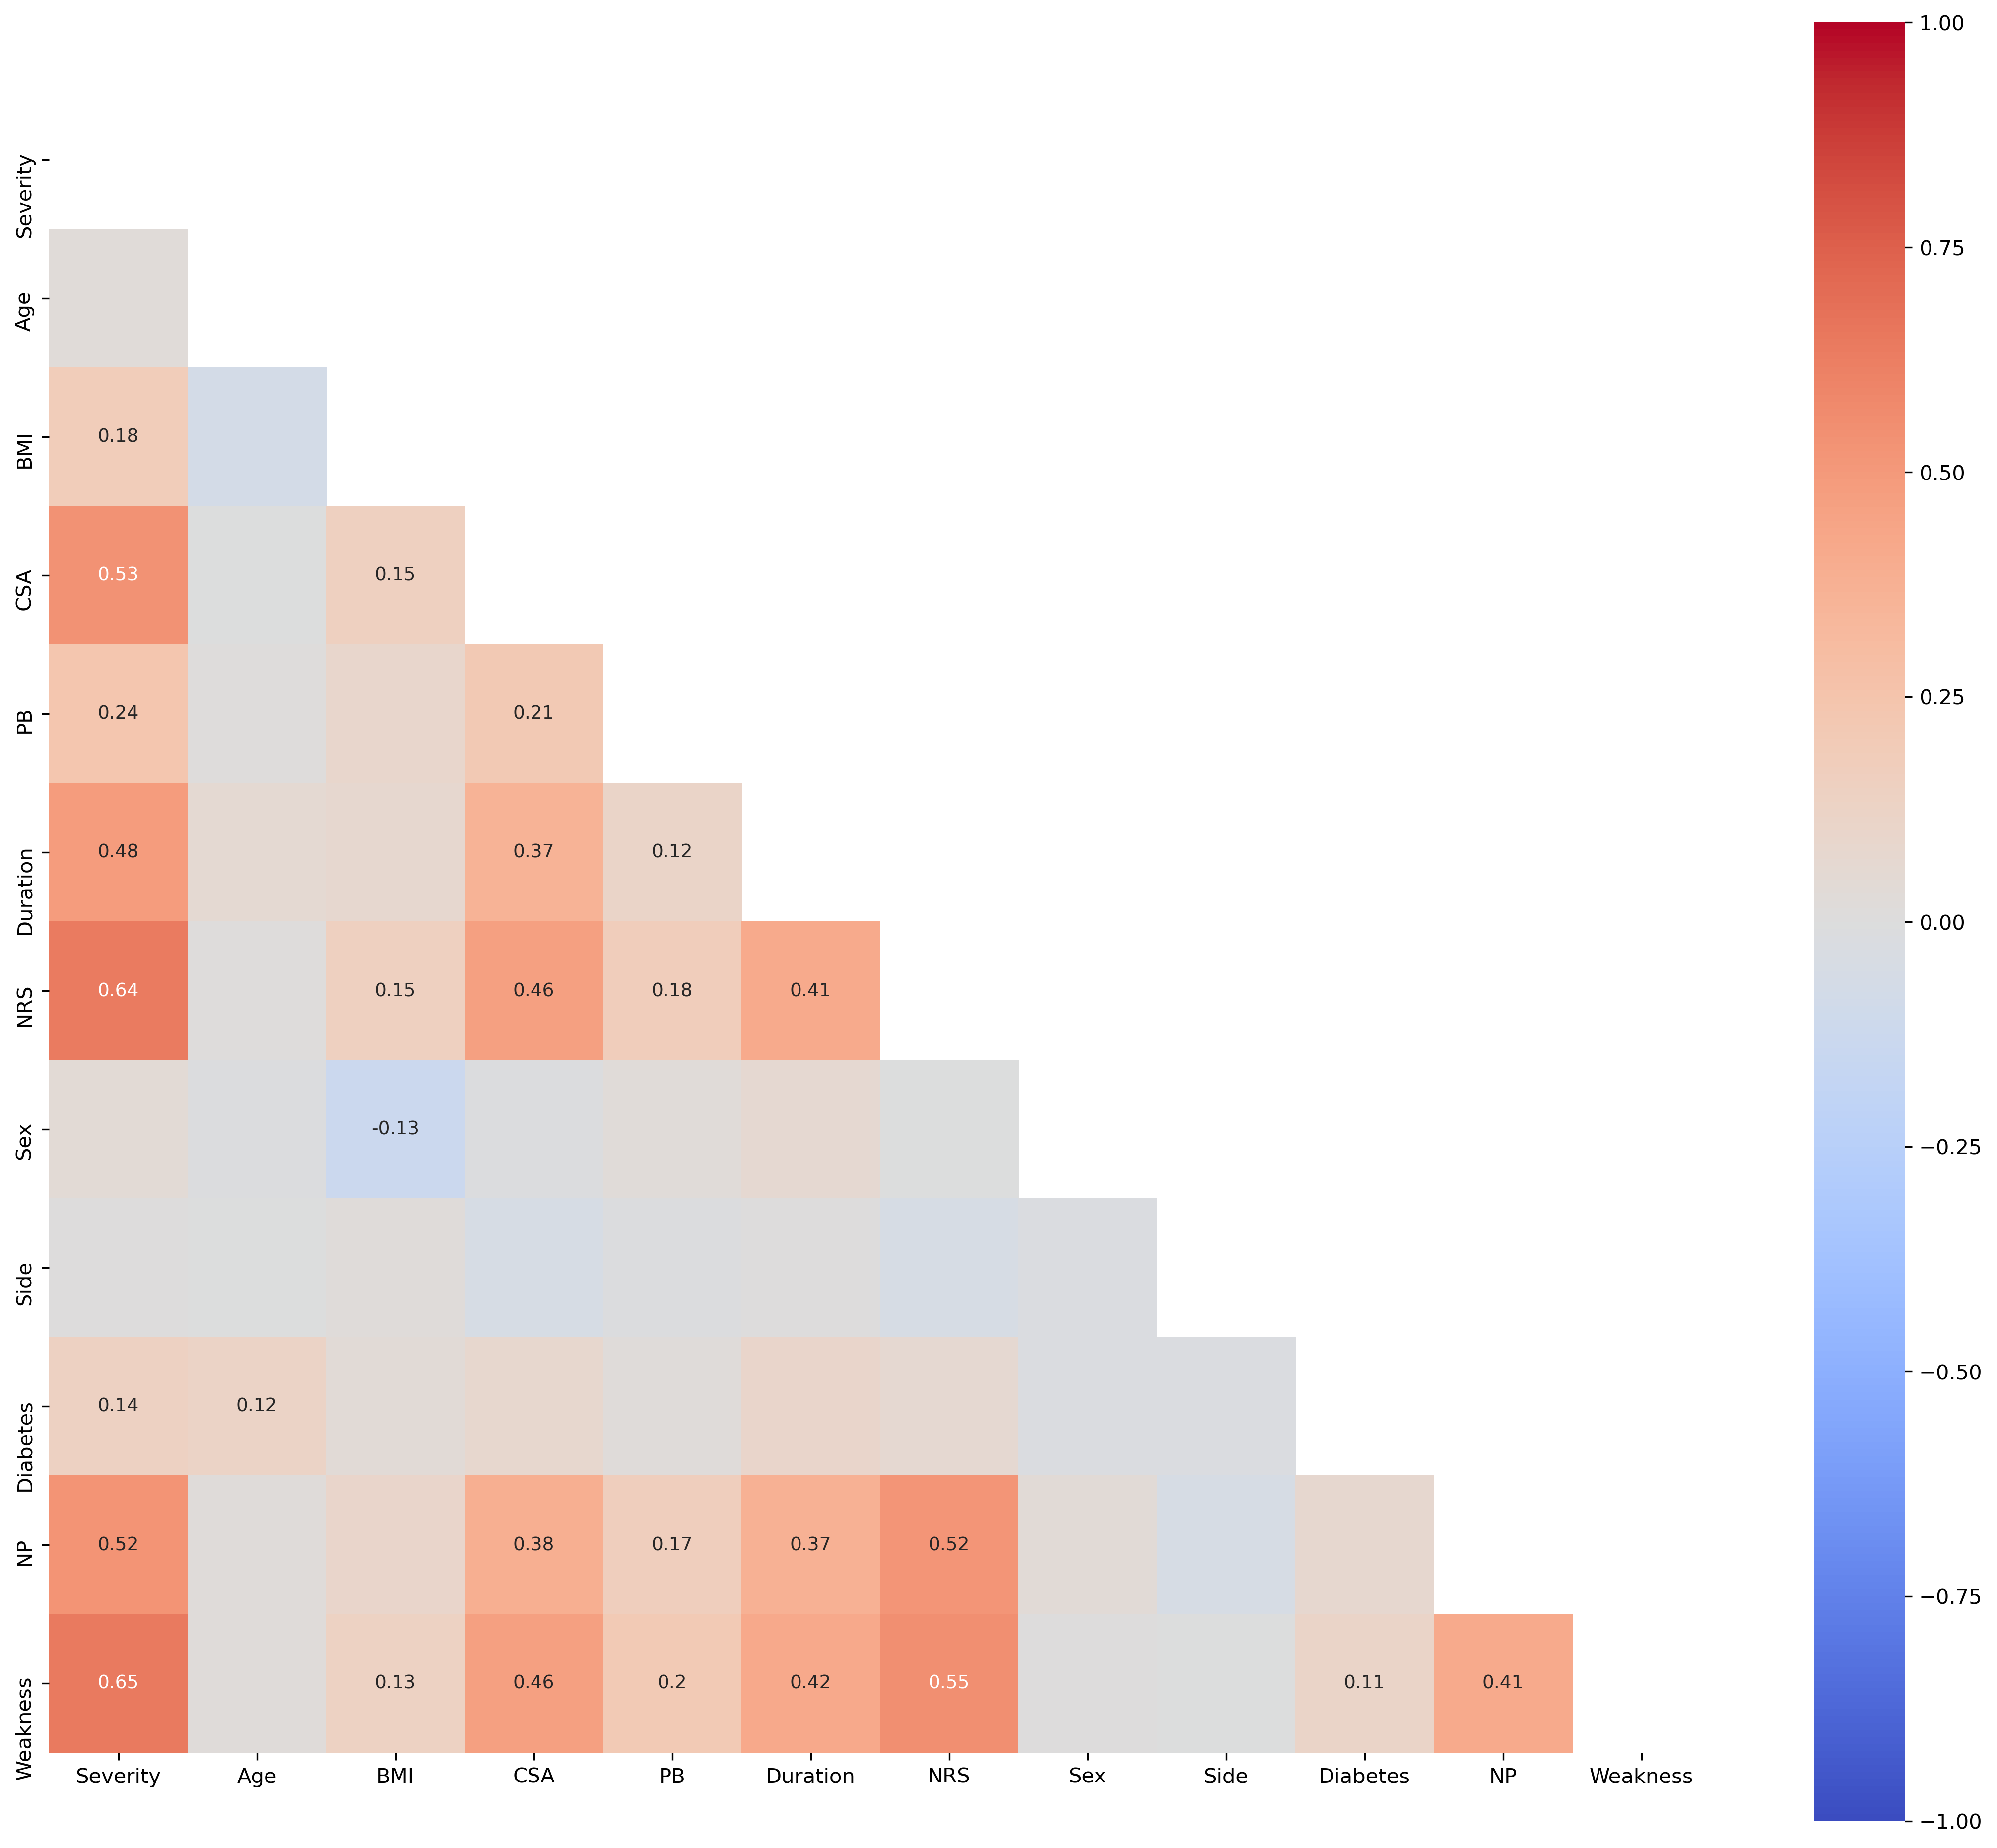

In [17]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize = (18,16))
ax = fig.gca()

corr = df_removed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, ax=ax, vmax=1, vmin=-1, center=0, square=True, mask=mask,
            cmap='coolwarm', annot=True, annot_kws = {"size": 9});

for t in ax.texts:
    if float(t.get_text())< -0.1 or float(t.get_text()) > 0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [18]:
df_adjusted

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,65,21.093750,10.0,1.9,3,2,1,1,0,0,0
1,2,68,20.415225,13.0,1.8,12,6,0,0,0,0,0
2,0,68,20.415225,13.0,1.5,12,3,0,1,0,0,0
3,0,63,28.507522,13.0,2.9,1,4,1,1,0,0,0
4,0,87,22.939751,12.0,2.0,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,60,22.189349,11.0,1.8,2,3,1,1,0,0,0
1033,2,49,24.196494,16.0,3.1,8,5,1,0,0,1,1
1034,0,41,23.808690,12.0,1.7,4,4,0,0,0,0,0
1035,0,67,26.986001,11.0,3.9,8,3,1,1,0,0,0


In [19]:
print(df['Age'].unique())
print(df['PB'].unique())
print(df['Duration'].unique())
print(df['NRS'].unique())
print('---------------------')
print(df['Side'].unique())
print(df['Diabetes'].unique())
print(df['NP'].unique())
print(df['Weakness'].unique())

[65 68 63 87 55 64 60 79 44 59 70 43 62 54 73 49 58 46 61 69 53 76 52 57
 50 72 74 71 67 45 38 77 33 82 22 66 75 48 56 51 81 41 86 78 40 36 47 83
 32 42 37 39 29 35 25 23 80 27 28 84 24 19]
[ 1.9   1.8   1.5   2.9   2.    2.3   4.5   3.4   2.7   3.3   1.2   2.4
  2.5   0.9   2.1   2.2   2.8   2.6   1.1   3.    3.8   3.2   4.    1.
  3.5   0.5   1.7   1.6   3.1   4.2   1.4   1.3   0.8   4.9   4.4  30.
  4.6   3.6   2.72  3.14 40.    4.89  2.61 22.8   4.8   5.2   5.1   3.9
  4.7   4.1   6.3   3.7   4.3   0.7   0.21  9.5   0.6   5.9   5.3 ]
[ 3 12  1  2  6  4  5  7 24  8  9 36 14 17 11 18 15 40 16 23 10 13  0 48
 60 22 31 28 38 30 20 32 50]
[ 2  6  3  4  5  1  7  8  9 10]
---------------------
[1 0]
[0 1]
[0 1]
[0 1]


## Standardyzacja

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_removed)

quality_vars_indexes = [0, 6, 7, 8, 9, 10, 11]
quality_vars_names = ['Severity', 'NRS', 'Sex', 'Side', 'Diabetes', 'NP', 'Weakness']

df_standardized = pd.DataFrame(scaler.transform(df_removed))
for i in range(len(quality_vars_indexes)):
    df_standardized[quality_vars_indexes[i]] = df_copy[quality_vars_names[i]]

df_standardized.rename(columns=col_mapper, inplace=True)

df_standardized

,Severity,Age,BMI,CSA,PB,Duration,NRS,Sex,Side,Diabetes,NP,Weakness
0,0,0.651714,-1.072510,-1.197444,-0.311441,-0.550318,2,1,1,0,0,0
1,2,0.929072,-1.271196,-0.500210,-0.366185,0.388643,6,0,0,0,0,0
2,0,0.929072,-1.271196,-0.500210,-0.530415,0.388643,3,0,1,0,0,0
3,0,0.466809,1.098399,-0.500210,0.235993,-0.758976,4,1,1,0,0,0
4,0,2.685670,-0.531962,-0.732621,-0.256698,-0.758976,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0,0.189452,-0.751695,-0.965033,-0.366185,-0.654647,3,1,1,0,0,0
1033,2,-0.827526,-0.163961,0.197023,0.345480,-0.028673,5,1,0,0,1,1
1034,0,-1.567146,-0.277518,-0.732621,-0.420928,-0.445989,4,0,0,0,0,0
1035,0,0.836619,0.652866,-0.965033,0.783428,-0.028673,3,1,1,0,0,0


# Ekstrakcja cech

Minimum zmiennych dla wariancji > 95%: 3
Minimum zmiennych dla wariancji > 99%: 4
Minimum zmiennych dla wariancji > 99.9%: 4


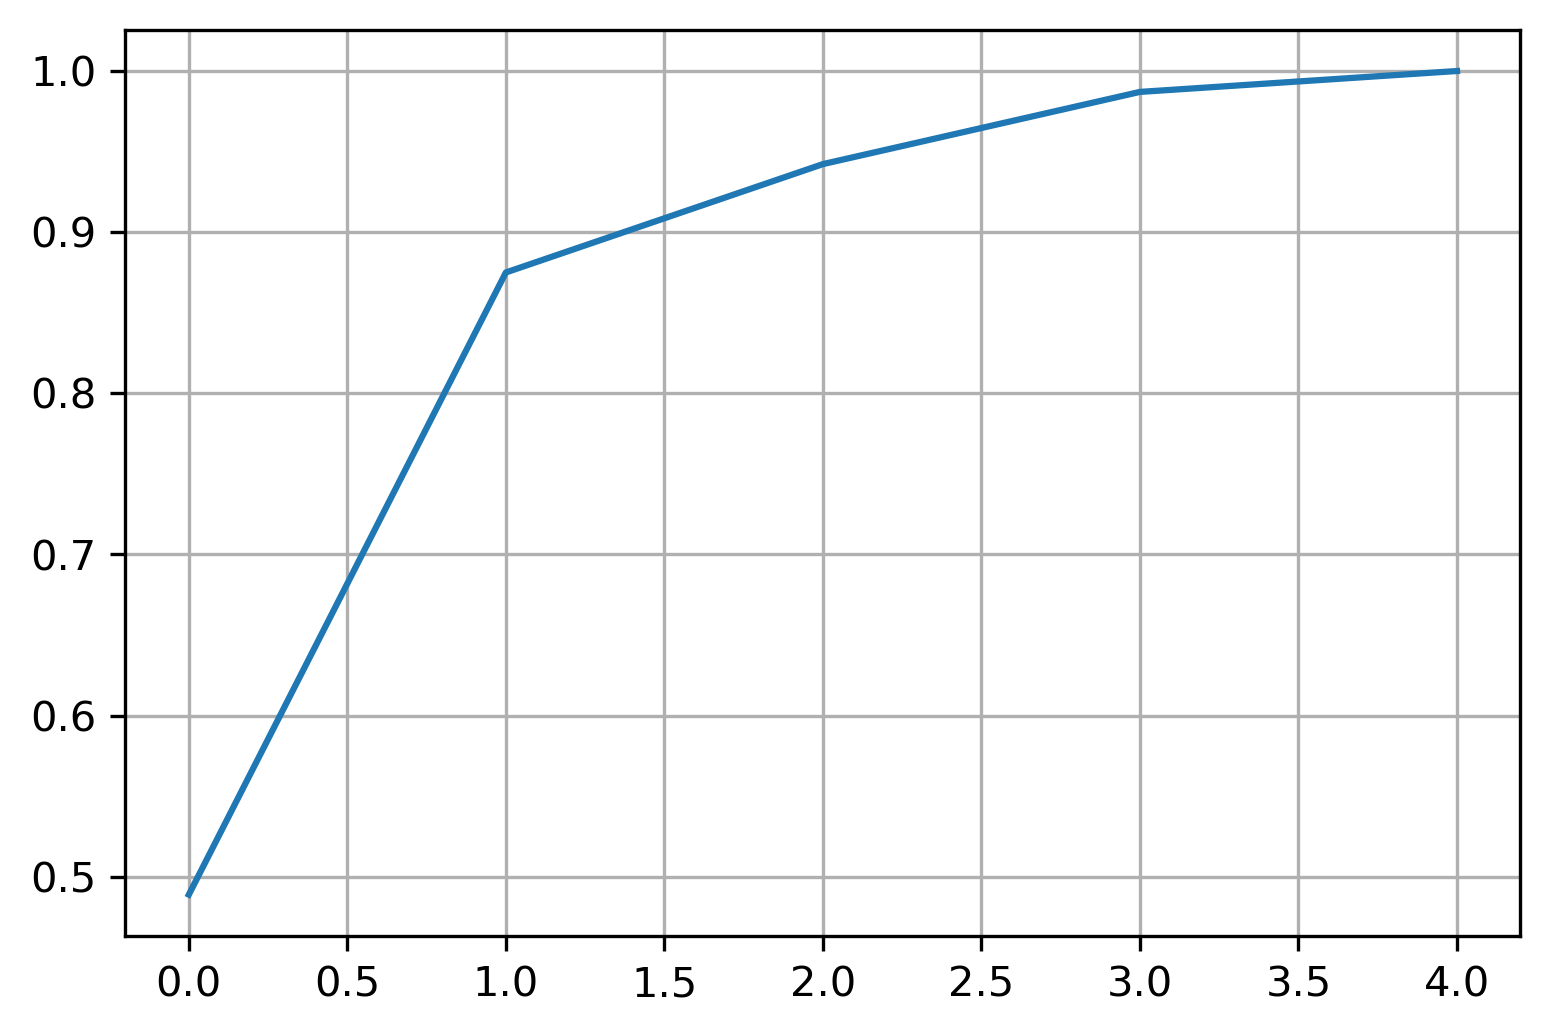

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(df_removed.iloc[:,1:6])

cev = pca.explained_variance_ratio_.cumsum()

plt.grid()
plt.plot(cev)
plt.savefig('variance.png')

print(f'Minimum zmiennych dla wariancji > 95%: {np.argmax(cev > 0.95)}')
print(f'Minimum zmiennych dla wariancji > 99%: {np.argmax(cev > 0.99)}')
print(f'Minimum zmiennych dla wariancji > 99.9%: {np.argmax(cev > 0.999)}')

In [22]:
pca2 = PCA(n_components=4)

df_reduced = pd.DataFrame(pca2.fit_transform(df_removed.iloc[:,0:11]))
df_reduced = df_reduced.join(df_standardized['NRS'])
df_reduced = df_reduced.join(df_standardized['Sex'])
df_reduced = df_reduced.join(df_standardized['Side'])
df_reduced = df_reduced.join(df_standardized['Diabetes'])
df_reduced = df_reduced.join(df_standardized['NP'])
df_reduced = df_reduced.join(df_standardized['Weakness'])
df_reduced = df_reduced.join(df_standardized['Severity'])

df_reduced

,0,1,2,3,NRS,Sex,Side,Diabetes,NP,Weakness,Severity
0,-5.347156,-8.126492,-5.075822,-1.694237,2,1,1,0,0,0,0
1,-10.672576,0.588534,-3.676703,-3.019831,6,0,0,0,0,0,2
2,-10.591772,0.245347,-4.360149,-2.968246,3,0,1,0,0,0,0
3,-2.952554,-8.432422,0.892403,4.113887,4,1,1,0,0,0,0
4,-26.209848,-14.981759,-1.778205,-0.250675,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1032,-0.297217,-7.512667,-3.551025,-1.158835,3,1,1,0,0,0,0
1033,8.662963,2.225581,0.721682,-1.037305,5,1,0,0,1,1,2
1034,17.587751,-0.589560,-2.768376,-0.311974,4,0,0,0,0,0,0
1035,-8.476801,-3.329811,-2.885255,3.708300,3,1,1,0,0,0,0


In [23]:
df_reduced = df_reduced.rename(columns={0: "X0", 1: "X1", 2: "X2", 3: "X3"})


df_reduced

,X0,X1,X2,X3,NRS,Sex,Side,Diabetes,NP,Weakness,Severity
0,-5.347156,-8.126492,-5.075822,-1.694237,2,1,1,0,0,0,0
1,-10.672576,0.588534,-3.676703,-3.019831,6,0,0,0,0,0,2
2,-10.591772,0.245347,-4.360149,-2.968246,3,0,1,0,0,0,0
3,-2.952554,-8.432422,0.892403,4.113887,4,1,1,0,0,0,0
4,-26.209848,-14.981759,-1.778205,-0.250675,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1032,-0.297217,-7.512667,-3.551025,-1.158835,3,1,1,0,0,0,0
1033,8.662963,2.225581,0.721682,-1.037305,5,1,0,0,1,1,2
1034,17.587751,-0.589560,-2.768376,-0.311974,4,0,0,0,0,0,0
1035,-8.476801,-3.329811,-2.885255,3.708300,3,1,1,0,0,0,0


In [24]:
df_reduced.to_pickle("dfReduced.pkl") 

## Trening klasyfikatorów

### K-Neighbours Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
    
def getAccuracy(result, actual_classification):
    c = 0
    i = 0
    for el in actual_classification:
        if result[i] == el:
            c += 1
            i += 1
            
    acc = c / len(result)
    return acc
    
def optimizeNoNeighbours(limit, X_train, X_test, y_train, y_test):
    best_acc = 0
    no_neighbours = 0
    for i in range(2, limit):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train, y_train)
        result = neigh.predict(X_test)
        acc = getAccuracy(result, y_test)
        if acc > best_acc:
            best_acc = acc
            no_neighbours = i
            
    return no_neighbours

classificationAcurracy = {}
classificationFscore = {}
classificationCrossVal = {}

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], test_size=0.265)

neighbours = optimizeNoNeighbours(40, X_train, X_test, y_train, y_test)

neigh = KNeighborsClassifier(n_neighbors=neighbours)
neigh.fit(X_train, y_train)

result = neigh.predict(X_test)

print("Acurracy for train data: " + str(neigh.score(X_train, y_train)))

print("Best result got for " + str(neighbours) + " neighbours with accuracy: " + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(neigh, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['knn'] = accuracy_score(result, y_test)
classificationFscore['knn'] = f1_score(y_test, result, average='macro')
classificationCrossVal['knn'] = scores.mean()

Acurracy for train data: 0.7480314960629921
Best result got for 10 neighbours with accuracy: 0.6327272727272727
Precision: 0.5916396374833616
Recall: 0.5680912672250303
F1 score = 0.5741913484480691
Confusion matrix: 
[[113  20   3]
 [ 25  26  15]
 [ 13  25  35]]
Cross Validaton:  0.6470968041620215


### Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

result = dt.predict(X_test)

print('Accuracy tested on train data: ' + str(dt.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')

f1 = 2 * (precision * recall) / (precision / recall)
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(dt, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['dt'] = accuracy_score(result, y_test)
classificationFscore['dt'] = f1_score(y_test, result, average='macro')
classificationCrossVal['dt'] = scores.mean()

Accuracy tested on train data: 1.0
Accuracy tested on test data: 0.6545454545454545
Precision: 0.6346630606265494
Recall: 0.632059922350011
F1 score = 0.6290343367393906
Confusion matrix: 
[[98 32  6]
 [13 36 17]
 [ 8 19 46]]
Cross Validaton:  0.626862690449647


### SVC with linear kernel

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_linear = SVC(kernel="linear", C=0.025)
svc_linear.fit(X_train, y_train)

result = svc_linear.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_linear.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_linear'] = accuracy_score(result, y_test)
classificationFscore['svc_linear'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_linear'] = scores.mean()

Accuracy tested on train data: 0.7335958005249343
Accuracy tested on test data: 0.7418181818181818
Precision: 0.7091211293260473
Recall: 0.6905772063910662
F1 score = 0.6978223033743466
Confusion matrix: 
[[121  14   1]
 [ 24  31  11]
 [  5  16  52]]
Cross Validaton:  0.7069072835377183


### SVC with poly kernel

In [29]:
from sklearn.svm import SVC

svc_poly = SVC(kernel="poly", C=5.025)
svc_poly.fit(X_train, y_train)

result = svc_poly.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_poly.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_poly, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_poly'] = accuracy_score(result, y_test)
classificationFscore['svc_poly'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_poly'] = scores.mean()

Accuracy tested on train data: 0.7165354330708661
Accuracy tested on test data: 0.6763636363636364
Precision: 0.6557261713058814
Recall: 0.5835368186294859
F1 score = 0.5934464351778447
Confusion matrix: 
[[130   6   0]
 [ 38  19   9]
 [ 21  15  37]]
Cross Validaton:  0.6528846153846155


### SVC with rfb kernel

In [30]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel="rbf", C=2.025)
svc_rbf.fit(X_train, y_train)

result = svc_rbf.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_rbf.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_rbf, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_rbf'] = accuracy_score(result, y_test)
classificationFscore['svc_rbf'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_rbf'] = scores.mean()

Accuracy tested on train data: 0.7532808398950132
Accuracy tested on test data: 0.6618181818181819
Precision: 0.622119321714151
Recall: 0.6086733572632042
F1 score = 0.6129712771136474
Confusion matrix: 
[[112  21   3]
 [ 19  30  17]
 [ 11  22  40]]
Cross Validaton:  0.6799284652545523


### SVC with sigmoid kernel

In [31]:
from sklearn.svm import SVC

svc_sigmoid = SVC(kernel="sigmoid", C=22.025)
svc_sigmoid.fit(X_train, y_train)

result = svc_sigmoid.predict(X_test)

print('Accuracy tested on train data: ' + str(svc_sigmoid.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_sigmoid, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['svc_sigmoid'] = accuracy_score(result, y_test)
classificationFscore['svc_sigmoid'] = f1_score(y_test, result, average='macro')
classificationCrossVal['svc_sigmoid'] = scores.mean()

Accuracy tested on train data: 0.55249343832021
Accuracy tested on test data: 0.5163636363636364
Precision: 0.4828111813757747
Recall: 0.48155507533025665
F1 score = 0.48082729375453903
Confusion matrix: 
[[83 36 17]
 [28 18 20]
 [10 22 41]]
Cross Validaton:  0.5573253437383873


### Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, max_depth=3)
rf.fit(X_train, y_train)

result = rf.predict(X_test)

print('Accuracy tested on train data: ' + str(rf.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['rf'] = accuracy_score(result, y_test)
classificationFscore['rf'] = f1_score(y_test, result, average='macro')
classificationCrossVal['rf'] = scores.mean()

Accuracy tested on train data: 0.7375328083989501
Accuracy tested on test data: 0.7090909090909091
Precision: 0.6721211483186428
Recall: 0.642829381648882
F1 score = 0.6516681971227425
Confusion matrix: 
[[123  12   1]
 [ 28  26  12]
 [ 10  17  46]]
Cross Validaton:  0.7069072835377183


### Regrasja Logistyczna

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

result = lr.predict(X_test)

print('Accuracy tested on train data: ' + str(lr.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(svc_linear, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['lr'] = accuracy_score(result, y_test)
classificationFscore['lr'] = f1_score(y_test, result, average='macro')
classificationCrossVal['lr'] = scores.mean()

Accuracy tested on train data: 0.7545931758530183
Accuracy tested on test data: 0.7381818181818182
Precision: 0.7035111821508302
Recall: 0.6923566853059198
F1 score = 0.6970086186035256
Confusion matrix: 
[[118  17   1]
 [ 22  31  13]
 [  6  13  54]]
Cross Validaton:  0.7069072835377183


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Uczenie zespołowe

In [34]:
from sklearn.ensemble import VotingClassifier

vc_hard = VotingClassifier(estimators=[
                ('svc_linear', svc_linear),
                ('dt', dt),
                ('neigh', neigh)
            ], voting='hard')

vc_hard.fit(X_train, y_train)

result = vc_hard.predict(X_test)

print('Accuracy tested on train data: ' + str(vc_hard.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(vc_hard, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['voting1'] = accuracy_score(result, y_test)
classificationFscore['voting1'] = f1_score(y_test, result, average='macro')
classificationCrossVal['voting1'] = scores.mean()

Accuracy tested on train data: 0.84251968503937
Accuracy tested on test data: 0.7090909090909091
Precision: 0.6835830835830836
Recall: 0.6541960702919607
F1 score = 0.6638032720428945
Confusion matrix: 
[[119  16   1]
 [ 23  32  11]
 [ 12  17  44]]
Cross Validaton:  0.6944026384243775


In [35]:
vc_hard2 = VotingClassifier(estimators=[
                ('lr', lr),
                ('neigh', neigh),
                ('svc_rbf', svc_rbf)
            ], voting='hard')

vc_hard2.fit(X_train, y_train)

result = vc_hard2.predict(X_test)

print('Accuracy tested on train data: ' + str(vc_hard2.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(vc_hard2, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['voting2'] = accuracy_score(result, y_test)
classificationFscore['voting2'] = f1_score(y_test, result, average='macro')
classificationCrossVal['voting2'] = scores.mean()

Accuracy tested on train data: 0.7611548556430446
Accuracy tested on test data: 0.6690909090909091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Precision: 0.6325757575757576
Recall: 0.6109757933891696
F1 score = 0.6177965552965553
Confusion matrix: 
[[115  19   2]
 [ 22  29  15]
 [ 15  18  40]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validaton:  0.6779868078781123


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
     ('rf', rf),
    ('svc', svc_linear),
    ('dt', dt)
]
clfStacking = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clfStacking.fit(X_train, y_train)

result = clfStacking.predict(X_test)

print('Accuracy tested on train data: ' + str(clfStacking.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(clfStacking, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['stacking1'] = accuracy_score(result, y_test)
classificationFscore['stacking1'] = f1_score(y_test, result, average='macro')
classificationCrossVal['stacking1'] = scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy tested on train data: 0.7860892388451444
Accuracy tested on test data: 0.7236363636363636
Precision: 0.6871293534896475
Recall: 0.6745761401281144
F1 score = 0.6796061812175029
Confusion matrix: 
[[118  16   2]
 [ 21  32  13]
 [  4  20  49]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validaton:  0.7126904496469715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
estimators2 = [
     ('rf', rf),
    ('dt', dt),
    ('neigh', neigh)
]
clfStacking2 = StackingClassifier(
    estimators=estimators2, final_estimator=SVC()
)

clfStacking2.fit(X_train, y_train)

result = clfStacking2.predict(X_test)

print('Accuracy tested on train data: ' + str(clfStacking2.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

scores = cross_val_score(clfStacking2, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

classificationAcurracy['stacking2'] = accuracy_score(result, y_test)
classificationFscore['stacking2'] = f1_score(y_test, result, average='macro')
classificationCrossVal['stacking2'] = scores.mean()

Accuracy tested on train data: 0.8333333333333334
Accuracy tested on test data: 0.7163636363636363
Precision: 0.6771749394700214
Recall: 0.6644751300271042
F1 score = 0.6694876105326232
Confusion matrix: 
[[118  16   2]
 [ 21  30  15]
 [  9  15  49]]
Cross Validaton:  0.7059829059829059


In [38]:
classificationAcurracy
sorted(((v, k) for k, v in classificationAcurracy.items()), reverse=True)

[(0.7418181818181818, 'svc_linear'),
 (0.7381818181818182, 'lr'),
 (0.7236363636363636, 'stacking1'),
 (0.7163636363636363, 'stacking2'),
 (0.7090909090909091, 'voting1'),
 (0.7090909090909091, 'rf'),
 (0.6763636363636364, 'svc_poly'),
 (0.6690909090909091, 'voting2'),
 (0.6618181818181819, 'svc_rbf'),
 (0.6545454545454545, 'dt'),
 (0.6327272727272727, 'knn'),
 (0.5163636363636364, 'svc_sigmoid')]

Można zauważyć duplikaty wartości metryki acurracy dla niektórych klasyfikatorów - nie jest to błąd, są to faktyczne wyniki uczenia modelu - istnieją różnice w macierzach pomyłek między klasyfikatorami.

In [39]:
classificationFscore
sorted(((v, k) for k, v in classificationFscore.items()), reverse=True)

[(0.6978223033743466, 'svc_linear'),
 (0.6970086186035256, 'lr'),
 (0.6796061812175029, 'stacking1'),
 (0.6694876105326232, 'stacking2'),
 (0.6638032720428945, 'voting1'),
 (0.6516681971227425, 'rf'),
 (0.6290343367393906, 'dt'),
 (0.6177965552965553, 'voting2'),
 (0.6129712771136474, 'svc_rbf'),
 (0.5934464351778447, 'svc_poly'),
 (0.5741913484480691, 'knn'),
 (0.48082729375453903, 'svc_sigmoid')]

In [40]:
classificationCrossVal
sorted(((v, k) for k, v in classificationCrossVal.items()), reverse=True)

[(0.7126904496469715, 'stacking1'),
 (0.7069072835377183, 'svc_linear'),
 (0.7069072835377183, 'rf'),
 (0.7069072835377183, 'lr'),
 (0.7059829059829059, 'stacking2'),
 (0.6944026384243775, 'voting1'),
 (0.6799284652545523, 'svc_rbf'),
 (0.6779868078781123, 'voting2'),
 (0.6528846153846155, 'svc_poly'),
 (0.6470968041620215, 'knn'),
 (0.626862690449647, 'dt'),
 (0.5573253437383873, 'svc_sigmoid')]

In [41]:
# TODO
# Optimizing classifiers
#
# Grid Search
# Genetic Hiperparameters Optimization
#

Klasyfikator stakujący dał najlepsze rezultaty klasyfikiacji z testowanych klasyfikatorów. Użytą kombinacją estymatorów są dt, svc_linear oraz rf, natomiast ostateczny klasyfikator to regresja logistyczna. Optymalizacja przy pomocy grid search będzie skupiała się na optymalizacji hiperparametrów wymienionych klasyfikatorów. Poprawienie jakości tych modeli powinno również prowadzić do lepszej jakości modelu stakującego korzystającego z tych klasyfikatorów.

Optymalizacja Random Forest

In [42]:
OptimizedModels = {}
OptimizedModelsCV = {}

In [101]:
from sklearn.model_selection import GridSearchCV
import time

parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [i for i in range(10, 100, 10)],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': ['balanced', 'balanced_subsample'],
              'max_leaf_nodes': [i for i in range(1, 10)],
             'min_samples_split': [i for i in range(1, 10)],
              'min_samples_leaf': [i in range(1, 10)]
             }
rfGridSearch = RandomForestClassifier(n_jobs=20)

start = time.time()

clfRF = GridSearchCV(rfGridSearch, parameters, scoring='accuracy', n_jobs=20)
clfRF.fit(X_train, y_train)

end = time.time()
print('Czas optymalizacji w sekundach: ' + str(end - start))

result = clfRF.predict(X_test)

print('Accuracy tested on train data: ' + str(clfRF.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

OptimizedModels['rf'] = (accuracy_score(result, y_test))

clfRF

Czas optymalizacji w sekundach: 5881.632083892822
Accuracy tested on train data: 0.7611548556430446
Accuracy tested on test data: 0.6581818181818182
Precision: 0.655005902494004
Recall: 0.6340266077373249
F1 score = 0.6373907084015596
Confusion matrix: 
[[99 36  1]
 [18 35 13]
 [ 4 22 47]]


GridSearchCV(estimator=RandomForestClassifier(n_jobs=20), n_jobs=20,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [True],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='accuracy')

In [111]:
scores = cross_val_score(clfRF.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores.mean())

OptimizedModelsCV['rf'] = cross_val_score(clfRF.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()


Cross Validaton:  0.6963257153474546


In [112]:
clfRF.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=6,
                       max_features='log2', max_leaf_nodes=9,
                       min_samples_leaf=True, min_samples_split=9,
                       n_estimators=10, n_jobs=20)

Optymalizacja SVC Linear

In [102]:
parameters = {'kernel':['linear', 'sigmoid', 'poly', 'rbf'],
              'C':[C for C in np.arange(0.01, 11.01, 1.0)],
              'gamma': ['scale', 'auto'],
              'degree': [3, 4, 5, 6, 7, 8],
              'decision_function_shape': ['ovo', 'ovr'],
              'shrinking': [True, False]
             }
svcGridSearch = SVC()
start = time.time()

clfSVC = GridSearchCV(svcGridSearch, parameters, scoring='accuracy', n_jobs=20)
clfSVC.fit(X_train, y_train)

end = time.time()
print('Czas optymalizacji: ' + str(end - start))

result = clfSVC.predict(X_test)

print('Accuracy tested on train data: ' + str(clfSVC.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

OptimizedModels['svc'] = (accuracy_score(result, y_test))

clfSVC

Czas optymalizacji: 2778.804984331131
Accuracy tested on train data: 0.7388451443569554
Accuracy tested on test data: 0.7163636363636363
Precision: 0.6883642064177624
Recall: 0.6590980310762744
F1 score = 0.6682598829956553
Confusion matrix: 
[[121  14   1]
 [ 24  32  10]
 [  6  23  44]]


GridSearchCV(estimator=SVC(), n_jobs=20,
             param_grid={'C': [0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01,
                               8.01, 9.01, 10.01],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6, 7, 8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [113]:
clfSVC.best_estimator_

SVC(C=2.01, decision_function_shape='ovo', kernel='linear')

In [114]:
scores = cross_val_score(clfSVC.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores)

OptimizedModelsCV['svc'] = cross_val_score(clfSVC.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()

Cross Validaton:  [0.6875     0.66826923 0.73913043 0.66183575 0.83574879]


Optymalizacja Decision Tree

In [103]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [i for i in range(1, 11)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [i for i in range(1,10)],
              'min_samples_split': [i for i in range(1, 10)],
              'max_leaf_nodes': [i for i in range(1, 10)]
             }
dtcGridSearch = DecisionTreeClassifier()
start = time.time()
clfDT = GridSearchCV(dtcGridSearch, parameters, scoring='accuracy', n_jobs=20)
clfDT.fit(X_train, y_train)

end = time.time()
print('Czas optymalizacji: ' + str(end - start))

result = clfDT.predict(X_test)

print('Accuracy tested on train data: ' + str(clfDT.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

OptimizedModels['dt'] = (accuracy_score(result, y_test))

clfDT

Czas optymalizacji: 150.72923374176025
Accuracy tested on train data: 0.7217847769028871
Accuracy tested on test data: 0.6727272727272727
Precision: 0.666919191919192
Recall: 0.6374848403454366
F1 score = 0.6443634102216191
Confusion matrix: 
[[106  29   1]
 [ 21  35  10]
 [  5  24  44]]


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=20,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [115]:
scores = cross_val_score(clfDT.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores)

OptimizedModelsCV['dt'] = cross_val_score(clfDT.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()

Cross Validaton:  [0.62980769 0.61538462 0.61835749 0.6763285  0.71980676]


In [116]:
clfDT.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features='log2', max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

Optymalizacja Logistic Regression

In [109]:
parameters = {'C':[C for C in np.arange(0.01, 101.01, 1.0)],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
              'dual': [True, False],
              'fit_intercept': [True, False],
              'class_weight': ['balanced', None]
             }

lrGridSearch = LogisticRegression(max_iter=1000, n_jobs=20)
start = time.time()
clfLR = GridSearchCV(lrGridSearch, parameters, scoring='accuracy', n_jobs=20)
clfLR.fit(X_train, y_train)

end = time.time()
print('Czas optymalizacji: ' + str(end - start))

result = clfLR.predict(X_test)

print('Accuracy tested on train data: ' + str(clfLR.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

OptimizedModels['lr'] = (accuracy_score(result, y_test))

clfLR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Czas optymalizacji: 74.88307881355286
Accuracy tested on train data: 0.7506561679790026
Accuracy tested on test data: 0.72
Precision: 0.679205638193975
Recall: 0.6612427660977218
F1 score = 0.6675937068271817
Confusion matrix: 
[[121  14   1]
 [ 26  27  13]
 [  6  17  50]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=20), n_jobs=20,
             param_grid={'C': [0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01,
                               8.01, 9.01, 10.01, 11.01, 12.01, 13.01, 14.01,
                               15.01, 16.01, 17.01, 18.01, 19.01, 20.01, 21.01,
                               22.01, 23.01, 24.01, 25.01, 26.01, 27.01, 28.01,
                               29.01, ...],
                         'class_weight': ['balanced', None],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [117]:
scores = cross_val_score(clfLR.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores)

OptimizedModelsCV['lr'] = cross_val_score(clfLR.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

Cross Validaton:  [0.74038462 0.63942308 0.76328502 0.65700483 0.80676329]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: Conve

In [118]:
clfLR.best_estimator_

LogisticRegression(C=15.01, dual=True, max_iter=1000, n_jobs=20,
                   solver='liblinear')

Klasyfikator stackujący dla zoptymalizowanych klasyfikatorów składowych.

In [110]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
     ('rf', clfRF.best_estimator_),
    ('svc', clfSVC.best_estimator_),
    ('dt', clfDT.best_estimator_)
]
clfStackingOptimized = StackingClassifier(
    estimators=estimators, final_estimator=clfLR.best_estimator_
)

clfStackingOptimized.fit(X_train, y_train)

result = clfStackingOptimized.predict(X_test)

print('Accuracy tested on train data: ' + str(clfStackingOptimized.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

OptimizedModels['stackingOptimized'] = (accuracy_score(result, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy tested on train data: 0.7703412073490814
Accuracy tested on test data: 0.7090909090909091
Precision: 0.6857512203193514
Recall: 0.668340333227521
F1 score = 0.6734692969746883
Confusion matrix: 
[[113  22   1]
 [ 19  35  12]
 [  4  22  47]]


In [119]:
scores = cross_val_score(clfStackingOptimized, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores)

OptimizedModelsCV['stackingOptimized'] = cross_val_score(clfStackingOptimized, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

Cross Validaton:  [0.71634615 0.65865385 0.72463768 0.62801932 0.79227053]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

In [120]:
sorted(((v, k) for k, v in OptimizedModels.items()), reverse=True)

[(0.72, 'lr'),
 (0.7163636363636363, 'svc'),
 (0.7090909090909091, 'stackingOptimized'),
 (0.6727272727272727, 'dt'),
 (0.6581818181818182, 'rf')]

In [121]:
sorted(((v, k) for k, v in OptimizedModelsCV.items()), reverse=True)

[(0.7184968413229283, 'svc'),
 (0.7136519881085098, 'lr'),
 (0.7107673727238945, 'stackingOptimized2'),
 (0.7079013377926422, 'stackingOptimized'),
 (0.6895531400966184, 'rf'),
 (0.6586677814938684, 'dt')]

### Optymalizacja stacking classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
import time


estimators = [('rf', RandomForestClassifier()),
              ('svc', SVC()),
             ('dt', DecisionTreeClassifier())]

sclf = StackingClassifier(estimators= estimators , final_estimator=clfLR.best_estimator_)

params = {'rf__n_estimators': [10, 25, 50, 100],
          'rf__criterion': ['gini', 'entropy'],
          'rf__max_depth': [3, 4, 5],
          'rf__max_features': ['auto', 'sqrt', 'log2'],
           'svc__kernel':['linear', 'rbf', 'poly', 'sigmoid'], 
           'svc__degree':[3, 4, 5, 6, 7],
           'svc__gamma':['scale', 'auto'],
           'svc__C':[C for C in np.arange(0.01, 11.01, 1.0)],
          'dt__criterion': ['gini', 'entropy'], 
          'dt__splitter': ['best', 'random'], 
          'dt__max_depth': [3, 4, 5],
          'dt__max_features': ['auto', 'sqrt', 'log2']
         }
start = time.time()

grid = GridSearchCV(estimator=sclf, param_grid=params, cv=5, n_jobs=20)
grid.fit(X_train, y_train)

end = time.time()
print('Czas optymalizacji w sekundach: ' + str(end - start))

In [68]:
grid.best_estimator_

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       max_features='sqrt',
                                                       n_estimators=10)),
                               ('svc', SVC(C=0.01, kernel='linear')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       max_features='sqrt',
                                                       splitter='random'))],
                   final_estimator=LogisticRegression(C=8.01, max_iter=1000))

In [69]:
result = grid.best_estimator_.predict(X_test)

print('Accuracy tested on train data: ' + str(grid.best_estimator_.score(X_train, y_train)))

print('Accuracy tested on test data: ' + str(accuracy_score(result, y_test)))

precision = precision_score(y_test, result, average='macro')
recall = recall_score(y_test, result, average='macro')
f1 = 2 * (precision * recall) / (precision / recall)

print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print("F1 score = " + str(f1_score(y_test, result, average='macro')))

print("Confusion matrix: ")
print(confusion_matrix(y_test, result))

Accuracy tested on train data: 0.7506561679790026
Accuracy tested on test data: 0.7018181818181818
Precision: 0.6943336816891748
Recall: 0.6622917327993879
F1 score = 0.6696639146970274
Confusion matrix: 
[[112  23   1]
 [ 21  37   8]
 [  4  25  44]]


In [70]:
scores = cross_val_score(grid.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5)
print('Cross Validaton: ', scores)

OptimizedModelsCV['stackingOptimized2'] = cross_val_score(grid.best_estimator_, df_reduced.iloc[:,0:10], df_reduced.iloc[:,10], cv=5).mean()

Cross Validaton:  [0.70192308 0.61538462 0.7294686  0.62318841 0.85507246]


In [71]:
sorted(((v, k) for k, v in OptimizedModelsCV.items()), reverse=True)

[(0.7223383500557414, 'lr'),
 (0.7184968413229283, 'svc'),
 (0.7136705685618729, 'stackingOptimized'),
 (0.7126858045336306, 'rf'),
 (0.7107673727238945, 'stackingOptimized2'),
 (0.6799052396878483, 'dt')]